# **Actividad Semana 7 - Modulo 4:** Data Analysis with python (IBM)

## **Nombre:** Yeison Fernando Villamil Franco - A01793803

# **Módulo 4: Model Development**

A continuación se presenta un resumen de las actividades para el `Módulo 4` del curso de análisis de datos. Adicionalmente se muestra en la imagen el progreso de este módulo.

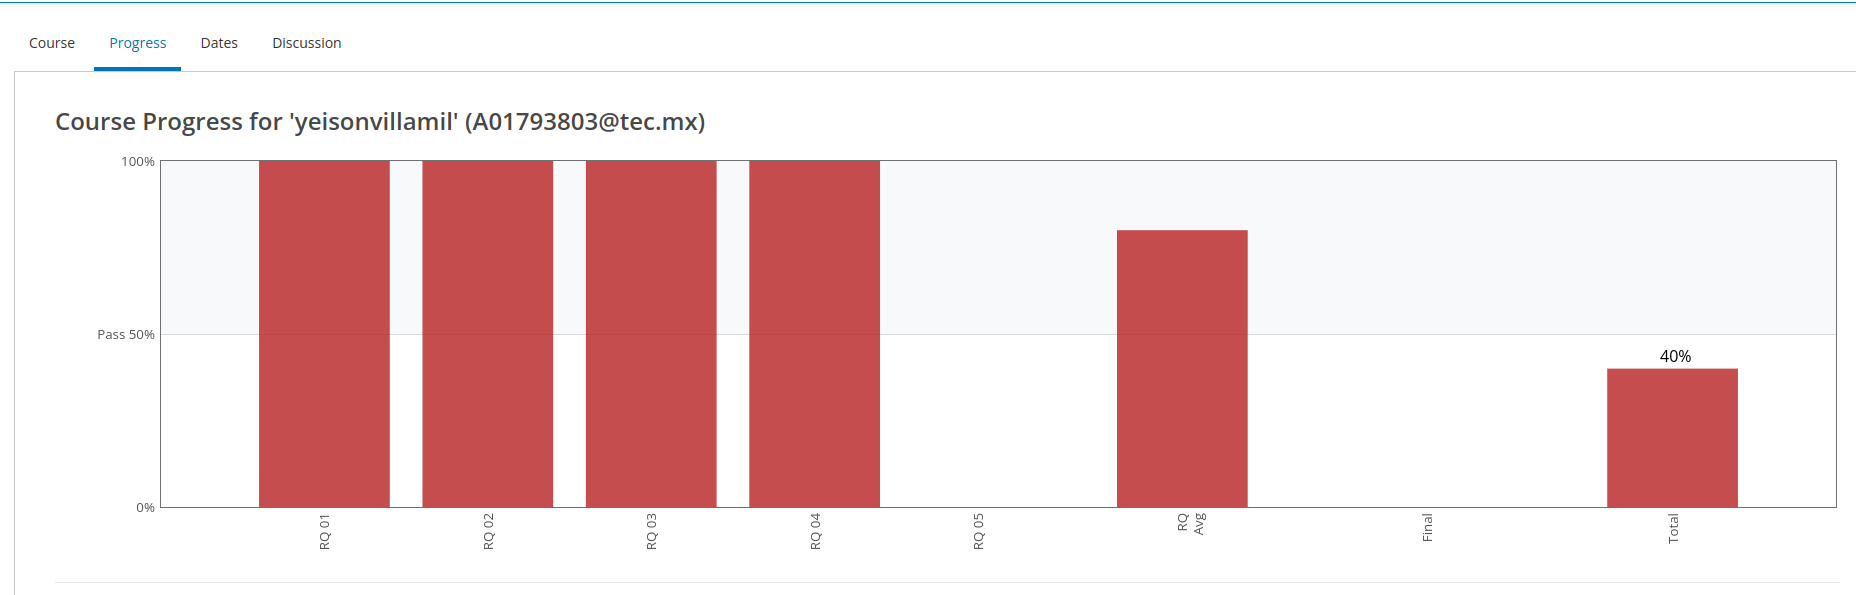

In [66]:
from PIL import Image
from IPython.display import Image

progress = Image("/home/yvillamil/Documents/TEC/1. Trimestre/Ciencia y analítica de datos/semana_7/progress_course_module4.png", width=900, height=300)
progress

## Model Development

* **MODELO:** Un modelo puede ser pensado como una ecuación matemática usada para predecir un valor dados otros valores
* Relaciona una o más variables independientes a una variable dependiente
* Usualmente los datos más relevantes pueden darte un mejor desempeño del modelo

## Linear and múltiple linear regression

* Regresión linear se refiere a una variable independiente para hacer predicciones
* Regresión linear múltiple se refiere a multiples variables independientes para realizar predicciones

### Regresión linear simple

* Predictor que es la variables independiente (x)
* Target u objetivo que es la variable dependiente (y)

$$
    y = b_0 + b_1x
$$

* `from sklearn.linear_model import LinearRegression`
* `model = LinearRegression()`

### Regresión linear múltiple

* Una variable continua u objetivo (y)
* Dos o más predictores (x)

$$ y = b_0 + b_1x_1 + b_2x_2 + b_3x_3 + ... + b_nx_n$$

## Model evaluation using visualization

Los plots para regresiones lineares
* Relación entre dos variables
* La correlación
* La dirección de la correlación (positivo o negavito)

Los plot pueden generar las siguientes combinaciones:
* Scatterplot: Donde cada punto se puede relaciones con la variable `y`
* Línea de regresión ajustada

* `sns.regplot()`
* `sns.residplot()` --> Para el grífico de residuales

Gráficos de distribución
* Los valores ajustados resultado del modelo
* Valores actuales

## Polynomial regression and pipelines

* Es un caso especial de regresion linear
* Es útil cuando se querie describir relaciones curvilineas: Término de mayor orden para las variables predictoras
* También se tienen regresiones polinomiales multidimensionales

$$ y = b_0 + b_1x_1 + b_2(x_1)^2$$

$$ y = b_0 + b_1x_1 + b_2(x_1)^2+b_3(x_1)^3$$

`from sklearn.preprocessing import PolynomialFeatures`

### Pipelines

Para el caso de los `pipelines`, estos pueden ser usados para realizar diferentes procesos en un mismo paso

## Measure for In-sample Evaluation

* Una manera para determinar de manera numérica que tan bueno es el modelo con el conjunto de entrenamiento
* Dos medidas importantes para el ajuste del modelo es: 
    * `MSE (Mean Squared Error)`
    * `R-squared (R^2)`

`from sklearn.metrics import mean_squared_error`

El R cuadrado determina:
* Que tan cerca los datos están de las línea ajustada a los datos
* El porcentaje de variación en función de la variable target (Y) explicada por el modelo linear

$$ R^2 = 1- (MSE_(regressin of line)/MSE_(averagedata))$$

## Prediction and decision making

Determinar el mejor modelo:
* Ver que los valores predichos tengan sentido
* Visualización
* Medidas numéricas para evaluación
* Comparar modelos

## **Laboratio**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [7]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Linear regression

In [9]:
lm = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']

In [10]:
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [11]:
print('Intercepto:', lm.intercept_)
print('Coeficientes:', lm.coef_)

Intercepto: 38423.3058581574
Coeficientes: [-821.73337832]


## Question 1 a)

Create a linear regression object called "lm1"

In [12]:
lm1 = LinearRegression()
lm1

LinearRegression()

---

## Question 2 b)

Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [14]:
X = df[['engine-size']]
Y = df['price']
lm1.fit(X, Y)
lm1

LinearRegression()

---

## Question 1 c)

Find the slope and intercept of the model

In [18]:
print('Valor del intercepto:', round(lm1.intercept_,3))
print('Valor de los coeficientes:', lm1.coef_)

Valor del intercepto: -7963.339
Valor de los coeficientes: [166.86001569]


---

## Question 1 d)

What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price"

* y = 'Price'
* x = 'engine-size'

$$y = -7963.34 + 166.86x$$

---

## **Multiple linear regression**

$$
Y_(hat) = a + b_1X_1 + b_2X_2 + b3X_3 + b_4X_4
$$

In [19]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

LinearRegression()

In [21]:
print('Valor del intercepto:', round(lm.intercept_, 3))
print('Valor de los coeficientes:', lm.coef_)

Valor del intercepto: -15806.625
Valor de los coeficientes: [53.49574423  4.70770099 81.53026382 36.05748882]


## Question 2 a)

Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and  "highway-mpg"

In [23]:
x = df[['normalized-losses', 'highway-mpg']]
y = df['price']
lm2 = LinearRegression()
lm2.fit(x, y)

LinearRegression()

## Question 2 b)

Find the coefficient of the model.

In [24]:
print('Valor de los coeficientes:', lm2.coef_)

Valor de los coeficientes: [   1.49789586 -820.45434016]


## **Visualization of data**

### Regression plot

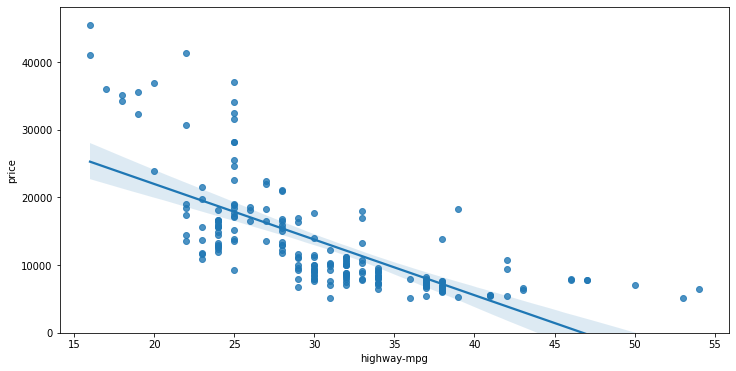

In [27]:
plt.figure(figsize=(12, 6))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.show()

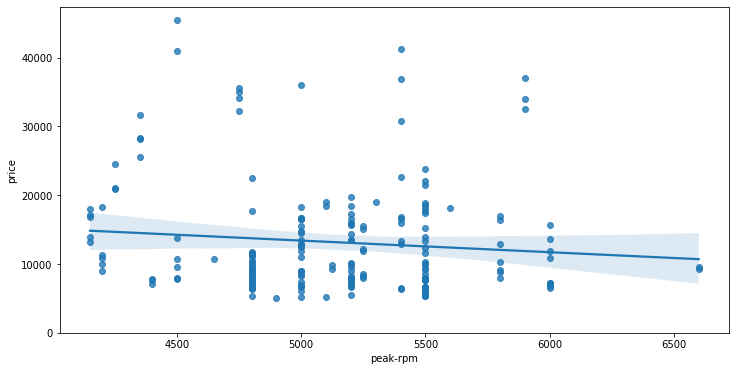

In [29]:
plt.figure(figsize=(12, 6))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)
plt.show()

---

## Question 3

Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method  ".corr()" to verify your answer

In [31]:
data = df[['peak-rpm', 'highway-mpg', 'price']]
data.corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


## Residual plot

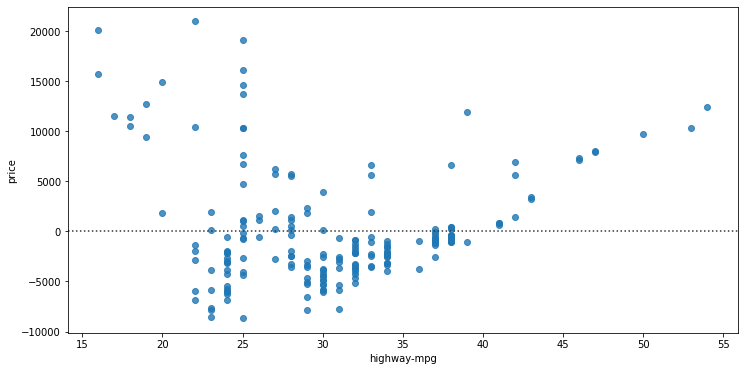

In [32]:
plt.figure(figsize=(12, 6))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

### Multiple linear regression

/home/yvillamil/anaconda3/envs/ml_projects/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/yvillamil/anaconda3/envs/ml_projects/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


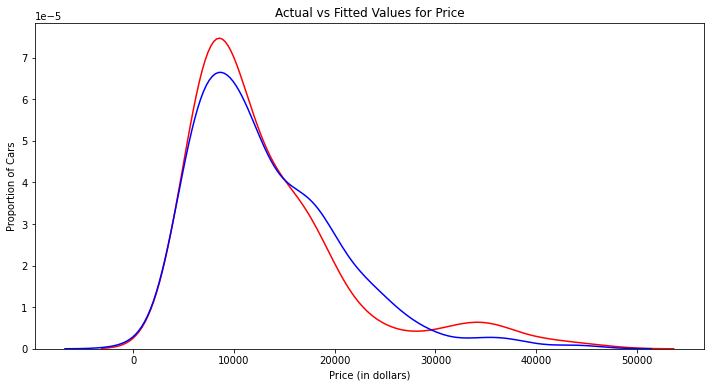

In [33]:
Y_hat = lm.predict(Z)
plt.figure(figsize=(12, 6))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## **Polynomial regression and pipelines**

In [34]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [35]:
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


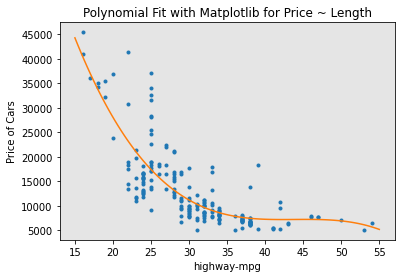

In [36]:
PlotPolly(p, x, y, 'highway-mpg')

In [37]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

---

## Question 4

Create 11 order polynomial model with the variables x and y from above

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


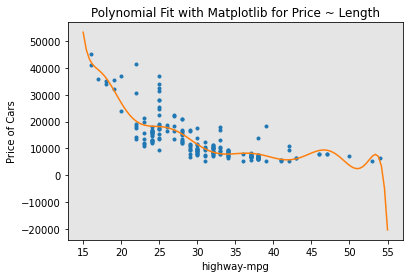

In [38]:
f = np.polyfit(x, y, 11)
model = np.poly1d(f)
print(model)
PlotPolly(model, x, y, 'highway-mpg')

---

In [40]:
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)

In [41]:
Z_pr.shape

(201, 15)

### Pipeline

In [43]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)

Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [44]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

---

## Question 5

Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y

In [46]:
pipe = Pipeline(steps=[('scaler', StandardScaler()), ('modelo', LinearRegression())])
pipe.fit(Z, y)

Pipeline(steps=[('scaler', StandardScaler()), ('modelo', LinearRegression())])

In [49]:
prediction = pipe.predict(Z)
prediction[-5:] ## últimos cinco valores

array([16694.4004372 , 19503.67920162, 20475.45837959, 17804.03881343,
       17104.07508015])

## Measures for In-sample evaluation

#### Simple linear regression

In [51]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', round((lm.score(X, Y)),3))

The R-square is:  0.761


In [52]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


In [55]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', round(mse,3))

The mean square error of price and predicted value is:  15021126.025


#### Multiple linear regression

In [57]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', round((lm.score(Z, df['price'])),3))

The R-square is:  0.809


In [58]:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Polynomial

In [61]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', round(r_squared,3))

The R-square value is:  0.674


In [62]:
mean_squared_error(df['price'], p(x))

20474146.426361218

## **Prediction and decision making**

In [63]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X, Y)

# Prediction
yhat=lm.predict(new_input)
yhat[0:5]

/home/yvillamil/anaconda3/envs/ml_projects/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

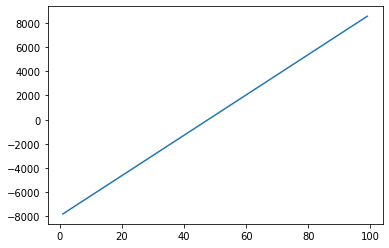

In [64]:
plt.plot(new_input, yhat)
plt.show()